# Congo Basin Wildlife Analysis

This project analyzes biodiversity in the Congo Basin using geospatial data, focusing on the habitat distribution of key species such as bonobos, chimpanzees, gorillas, forest elephants, and hippopotamuses. Using Python and libraries such as GeoPandas, Matplotlib, and Contextily, the habitats of these species are visualized on high-resolution maps, utilizing the Mollweide projection for accurate area representation.

## Dataset
The data used for this analysis comes from the IUCN Digital Distribution Maps for Mammals, provided as a shapefile. This dataset contains spatial and attribute information about mammal species, their geographic ranges, and other relevant metadata. The shapefile will be loaded and analyzed using `geopandas`.

# Environment Setup
To ensure reproducibility and smooth execution, the required packages and dependencies have been organized into a Conda environment. Use the `environment.yml` file to set up your environment with all necessary libraries, including `geopandas`, `matplotlib`, and `seaborn`.


# 1. Statistical exploaration


## 1.1. Parse the dataset

Print out the head of the dataset to see its structure

In [21]:
import geopandas as gpd # version: 0.9.0

gdf_iucn = gpd.read_file('MAMMALS\MAMMALS.shp')
print('Number of records: ', len(gdf_iucn))
print('Number of attributes: ', len(gdf_iucn.keys()))
gdf_iucn.head(3)

Number of records:  12991
Number of attributes:  29


,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,...,order_,family,genus,category,marine,terrestria,freshwater,SHAPE_Leng,SHAPE_Area,geometry
0,88149174,Lophostoma occidentalis,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,PHYLLOSTOMIDAE,Lophostoma,NT,false,true,false,40.333023,16.395889,"MULTIPOLYGON (((-80.15034 -5.44154, -80.38175 ..."
1,163314140,Microcebus boraha,1,1,1,IUCN,2020,IUCN (International Union for Conservation of ...,None,None,...,PRIMATES,CHEIROGALEIDAE,Microcebus,DD,false,true,false,1.279308,0.014417,"POLYGON ((50.01109 -16.70219, 50.01082 -16.703..."
2,18555,Pseudomys pilligaensis,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,RODENTIA,MURIDAE,Pseudomys,DD,false,true,false,3.942112,0.653697,"POLYGON ((149.84833 -30.46726, 149.84878 -30.4..."


The geospatial data file appears to contain **29 attributes**, which we can learn more about by referring to the [metadata documentation](https://nc.iucnredlist.org/redlist/content/attachment_files/METADATA_for_Digital_Distribution_Maps_of_The_IUCN_Red_List_of_Threatened_Species___v6_3.pdf).


Each species got a unique ID

In [22]:
print(len(set(gdf_iucn.id_no)))
print(len(set(gdf_iucn.sci_name)))

5895
5895


The cell rertuns the value 5895 twice, ensuring that indeed, each species have one unique id_no and one unique sci_name.

## 1.2 Taxonomical categories

This cell analyzes the most common values and the total number of unique entries for key taxonomic columns (`'kingdom'`, `'phylum'`, `'class'`, `'order_'`, `'family'`, `'genus'`) in the dataset.

In [23]:
from collections import Counter

for a in ['kingdom', 'phylum', 'class', 'order_', 'family', 'genus']:    
    print(a, Counter(gdf_iucn[[a, 'sci_name']].drop_duplicates()[a].to_list()).most_common(3), len(set(gdf_iucn[a])))

kingdom [('ANIMALIA', 5895)] 1
phylum [('CHORDATA', 5895)] 1
class [('MAMMALIA', 5895)] 1
order_ [('RODENTIA', 2343), ('CHIROPTERA', 1320), ('PRIMATES', 524)] 27
family [('MURIDAE', 782), ('CRICETIDAE', 701), ('VESPERTILIONIDAE', 463)] 161
genus [('Crocidura', 197), ('Myotis', 122), ('Rhinolophus', 92)] 1293


## 1.3 Definition of different habitat types

Habitat types are characterized using the columns **presence**, **origin**, and **seasonal**, which are scored on a scale from 1 to 6, indicating attributes like extant, possibly extant, or extinct. These scores, combined with descriptions in the **legend** column, provide detailed habitat classifications. For more details, refer to the [spatial data legend](https://www.iucnredlist.org/resources/spatial-data-legend) and the [legend combinations document](https://nc.iucnredlist.org/redlist/content/attachment_files/Legend_combinations_Dec2018.pdf).


In [25]:
# Anzeige eindeutiger Werte basierend auf der Spalte 'presence'
unique_presence = gdf_iucn[['presence', 'origin', 'seasonal', 'legend']].drop_duplicates(subset=['presence'])
unique_presence


,presence,origin,seasonal,legend
0,1,1,1,Extant (resident)
16,6,1,1,Presence Uncertain
27,3,1,1,Possibly Extant (resident)
56,5,1,1,Extinct
69,4,1,1,Possibly Extinct
530,2,1,1,Probably Extant (resident)


This code generates bar charts to visualize the distributions of the **presence**, **origin**, and **seasonal** attributes from the dataset. The y-axis is set to a logarithmic scale to better display the frequency differences across values. Each chart highlights the relative occurrence of these categories, providing insights into the dataset's structure.


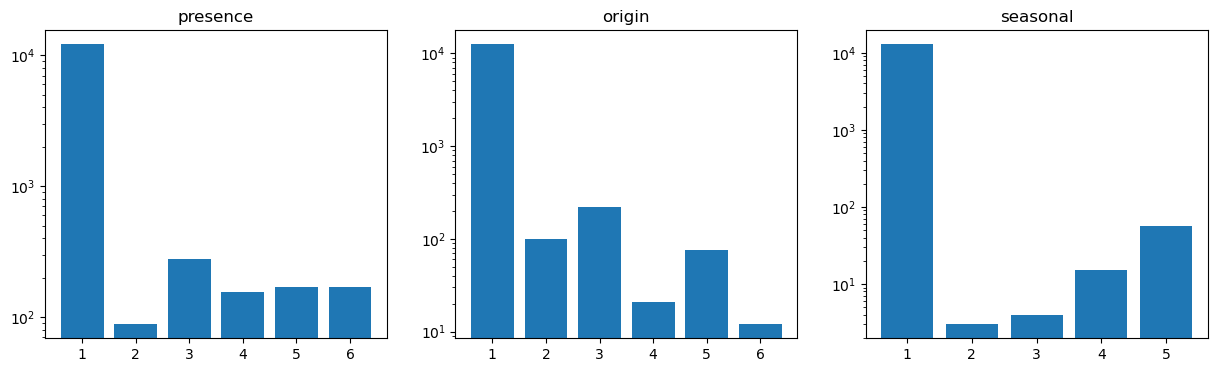

In [26]:
import matplotlib.pyplot as plt
from collections import Counter

def get_distribution(x):
    return list(zip(*[(k, v) for k, v in Counter(x.to_list()).most_common()]))

f, ax = plt.subplots(1,3,figsize = (15,4))

for idx, feat in enumerate(['presence', 'origin', 'seasonal']):    
    values, frequencies = get_distribution(gdf_iucn[feat])
    ax[idx].bar(values, frequencies)
    ax[idx].set_yscale('log')
    ax[idx].set_title(feat)

This code creates a bar chart to visualize the frequency of different **habitat characteristics** (from the `legend` column) in the dataset. The y-axis uses a logarithmic scale to handle varying frequencies, while the x-axis labels are rotated for better readability. This chart provides a clear overview of how common each habitat characteristic is.


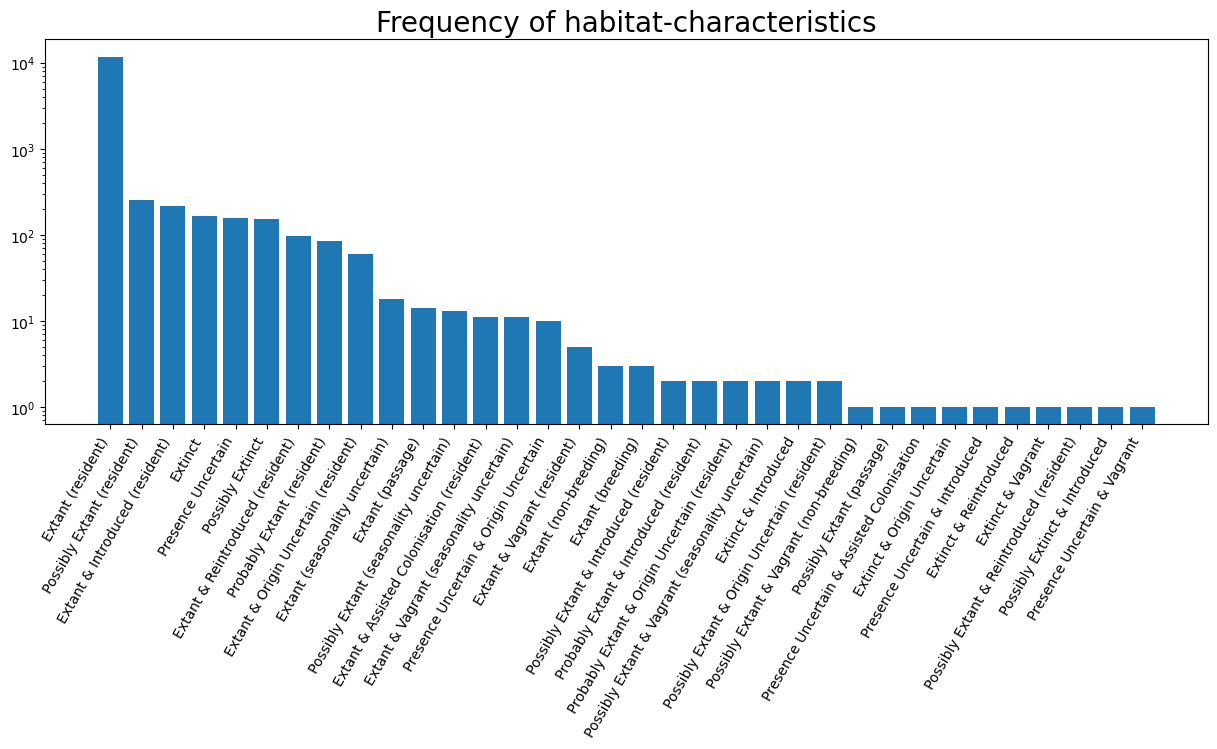

In [27]:
f, ax = plt.subplots(1,1,figsize = (15,5))

values, frequencies = get_distribution(gdf_iucn['legend'])
ax.bar(values, frequencies)
ax.set_title('Frequency of habitat-characteristics', fontsize = 20)
ax.set_yscale('log')
ax.set_xticks(range(len(values)))
ax.set_xticklabels(values, rotation = 60, ha = 'right')
plt.show()

The histogram shows that the most frequent habitat characteristic is "Extant (resident)", followed by variations like "Possibly Extant (resident)", while other combinations occur far less frequently, indicating a dominance of extant and resident classifications in the dataset.

## 1.4. Meta-information

The command Counter(gdf_iucn.compiler).most_common(5) retrieves the five most frequent entries in the compiler column of the gdf_iucn dataset, along with their respective counts.

This shows the top five entities or organizations that compiled the data most frequently in the dataset. It provides insight into which compilers were the most active or influential in contributing to the geospatial dataset.

In [28]:
Counter(gdf_iucn.compiler).most_common(5)


[('IUCN', 10959),
 ('IUCN SSC Small Mammal Specialist Group', 1081),
 ('Conor Mallory', 56),
 ('Heidi Ahonen and Anders Skoglund, NPI', 50),
 ('Stefan Michel', 48)]

The command Counter(gdf_iucn.source).most_common(5) retrieves the five most common entries in the source column of the gdf_iucn dataset, along with their respective frequencies.

This output highlights the top five sources from which the dataset's information was derived. It helps identify the most heavily utilized or referenced data providers within the dataset, offering insight into the primary origins of the geospatial data.

In [29]:
Counter(gdf_iucn.source).most_common(5)

[(None, 12216),
 ('Cuyler, C., Rowell, J., Adamczewski, J. et al. Muskox status, recent variation, and uncertain future. Ambio 49, 805–819 (2020). https://doi.org/10.1007/s13280-019-01205-x',
  56),
 ('Sargis et al. 2017', 14),
 ('Musser et al. 2010', 8),
 ('Stanley et al. 2015', 7)]

The command Counter(gdf_iucn.citation).most_common(5) retrieves the five most frequent entries in the citation column of the gdf_iucn dataset, along with their respective frequencies.

This output identifies the top five most frequently cited references or publications used in the dataset. It provides insight into the key documents or studies that were most relied upon to compile and validate the geospatial data.

In [30]:
Counter(gdf_iucn.citation).most_common(5)

[('IUCN (International Union for Conservation of Nature)', 11031),
 ('IUCN SSC Small Mammal Specialist Group', 1090),
 ('African Lion Database. Unpublished Data. 2023', 91),
 ('International Union for the Conservation of Nature', 81),
 ('IUCN SSC Caprinae Specialist Group', 56)]

The year of compilation column provides insight into how current the dataset is, with records spanning from 2008 to 2022. The significant peak in 2008 likely reflects the initial launch of the database, followed by a period of reduced updates, possibly due to limited funding or decreased demand for revisions in the years immediately after.

<BarContainer object of 17 artists>

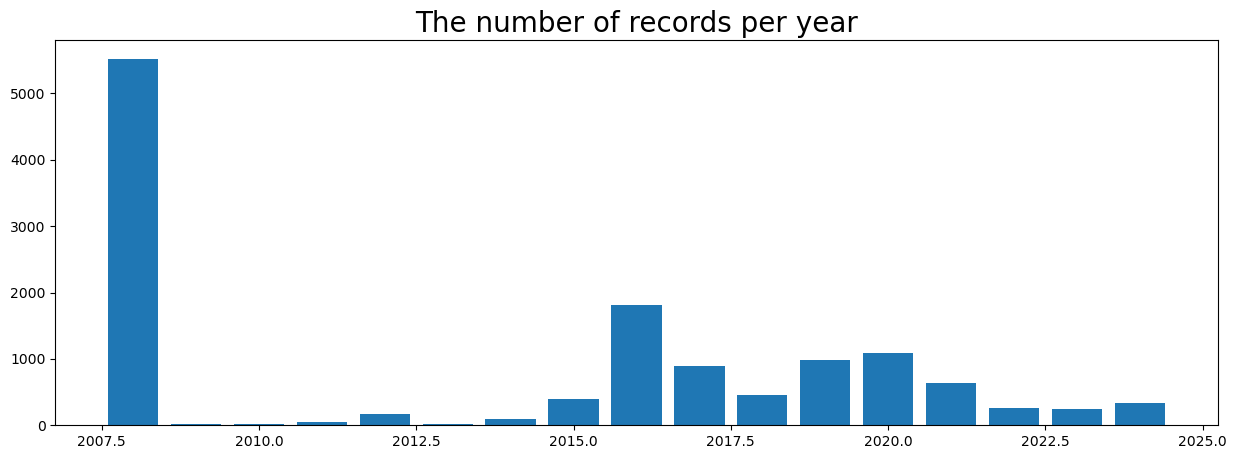

In [31]:
min(gdf_iucn.yrcompiled), max(gdf_iucn.yrcompiled)

f, ax = plt.subplots(1,1,figsize = (15,5))

ax.set_title('The number of records per year', fontsize = 20)
values, frequencies = get_distribution(gdf_iucn['yrcompiled'])
ax.bar(values, frequencies)

## 1.5. Endangerement information

The most important categorical variable in this dataset is the **conservation status**, recorded in the `category` column. The IUCN Red List defines nine categories, of which eight are present in this dataset:

- Critically Endangered (CR)
- Data Deficient (DD)
- Endangered (EN)
- Extinct in the Wild (EW)
- Extinct (EX)
- Least Concern (LC)
- Near Threatened (NT)
- Regionally Extinct (RE)
- Vulnerable (VU)

Notably, species categorized as **Critically Endangered (CR)**, **Endangered (EN)**, and **Vulnerable (VU)** are of particular concern.

These categories will be reformatted for clarity and counted, ensuring each species is included only once.

In [32]:
category_d = {  'EX' : 'Extinct',
                'EW' : 'Extinct in The Wild',
                'RE' : 'Regionally Extinct',
                'CR' : 'Critically Endangered',
                'EN' : 'Endangered',
                'VU' : 'Vulnerable', 
                'DD' : 'Data Deficient',
                'LC' : 'Least Concern',
                'NT' : 'Not Threatened'
     }

gdf_iucn['category'] = gdf_iucn['category'].map(category_d)

Counter(gdf_iucn[['sci_name', 'category']].drop_duplicates().category).most_common()

[('Least Concern', 3361),
 ('Data Deficient', 776),
 ('Vulnerable', 567),
 ('Endangered', 546),
 ('Not Threatened', 389),
 ('Critically Endangered', 241),
 ('Extinct', 14),
 ('Extinct in The Wild', 1)]

This line provides an alphabetically sorted list of all unique scientific names of species that are either extinct or extinct in the wild.

In [33]:
sorted(set(gdf_iucn[gdf_iucn.category.isin(['Extinct', 'Extinct in The Wild'])].sci_name.to_list()))

['Dusicyon australis',
 'Dusicyon avus',
 'Elaphurus davidianus',
 'Juscelinomys candango',
 'Leporillus apicalis',
 'Melomys rubicola',
 'Nesoryzomys darwini',
 'Nyctophilus howensis',
 'Palaeopropithecus ingens',
 'Pennatomys nivalis',
 'Pipistrellus murrayi',
 'Pteropus subniger',
 'Pteropus tokudae',
 'Sus bucculentus',
 'Xenothrix mcgregori']

This code visualizes the number of species in each conservation category, using two bar charts with color coding based on conservation urgency.

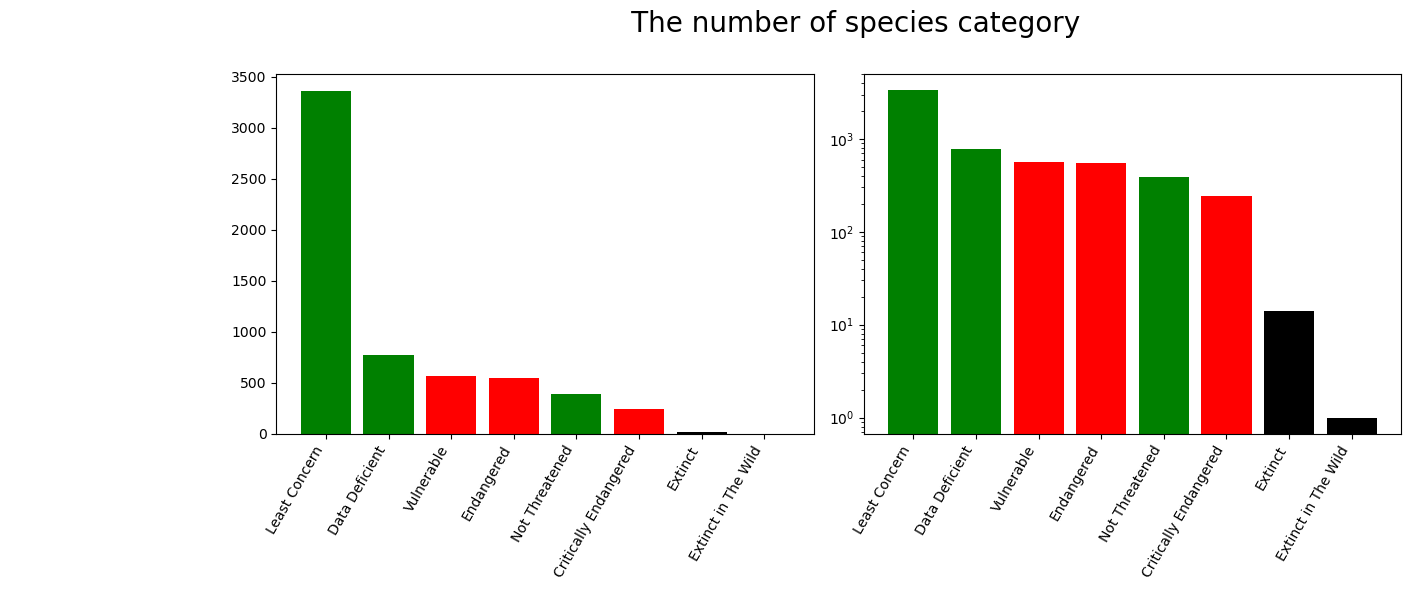

In [34]:
def get_color(x):
    if x in ['Critically Endangered', 'Endangered', 'Vulnerable']:
        return 'red'
    elif x in ['Extinct in The Wild', 'Regionally Extinct', 'Extinct']:
        return 'k'
    else:
        return 'green'

f, ax = plt.subplots(1,2,figsize = (12,6))

ax[0].set_title(70 * ' ' + 'The number of species category', fontsize = 20, pad = 30)
values, frequencies = get_distribution(gdf_iucn[['sci_name', 'category']].drop_duplicates().category)
colors = [get_color(v) for v in values]

for idx in range(2):
    ax[idx].bar(values, frequencies, color = colors)
    ax[idx].set_xticks(range(len(values)))
    ax[idx].set_xticklabels(values, rotation = 60, ha = 'right')
ax[1].set_yscale('log')

plt.tight_layout()

These bar charts provide a clear comparison of the number of species across conservation categories:
- **Colors**: Indicate the level of urgency (red for threatened, black for extinct, green for non-threatened).
- **Logarithmic Scale**: Emphasizes smaller but significant categories, such as extinct species.
- This visualization effectively highlights the dataset's distribution of conservation statuses.

# 2. Geospatial exploration

This cell reprojects the dataset gdf_iucn into the Mollweide projection, an equal-area projection commonly used for global maps to minimize area distortion. It then visualizes a random sample of 200 randomly choosen polygons from the dataset using GeoPandas, with black edges and semi-transparency to handle overlapping geometries. A categorical colormap is applied to assign distinct colors to different categories, providing a clear and visually distinct representation of the sampled data.

In [35]:
# transform the coordinate reference system
gdf_iucn_t = gdf_iucn.copy()
gdf_iucn_t = gdf_iucn_t.to_crs('+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')

<Axes: >

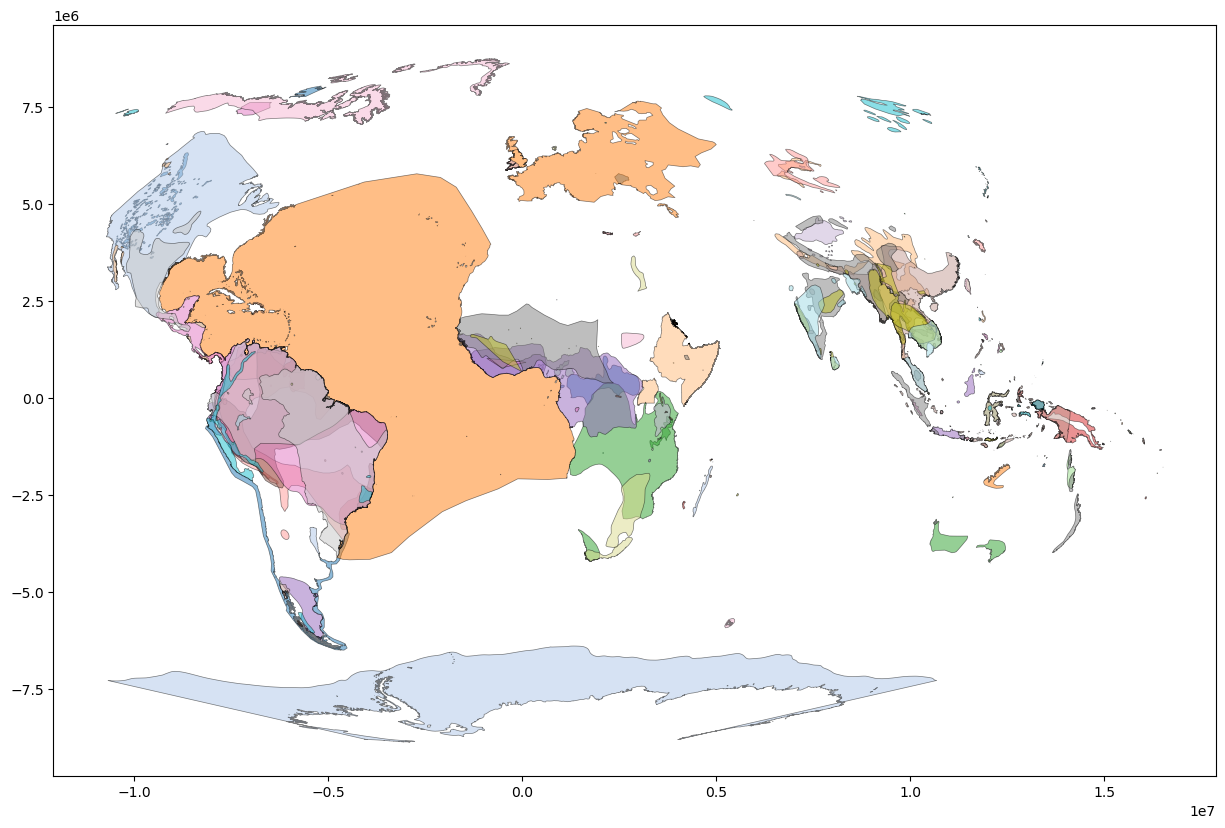

In [36]:

f, ax = plt.subplots(1,1,figsize=(15,10))
gdf_iucn_t.sample(200).plot(ax=ax, edgecolor = 'k', linewidth = 0.5, alpha = 0.5, cmap = 'tab20')

This cell reprojects the whole dataset into the Mollweide projection and plots habitat polygons with distinct colors and semi-transparency, saving the map as a high-resolution image.Simultaneously, system resource usage (CPU and RAM) is monitored in a separate thread to highlight how resource-intensive the computation is. A graph of resource usage over time is generated and saved for analysis.

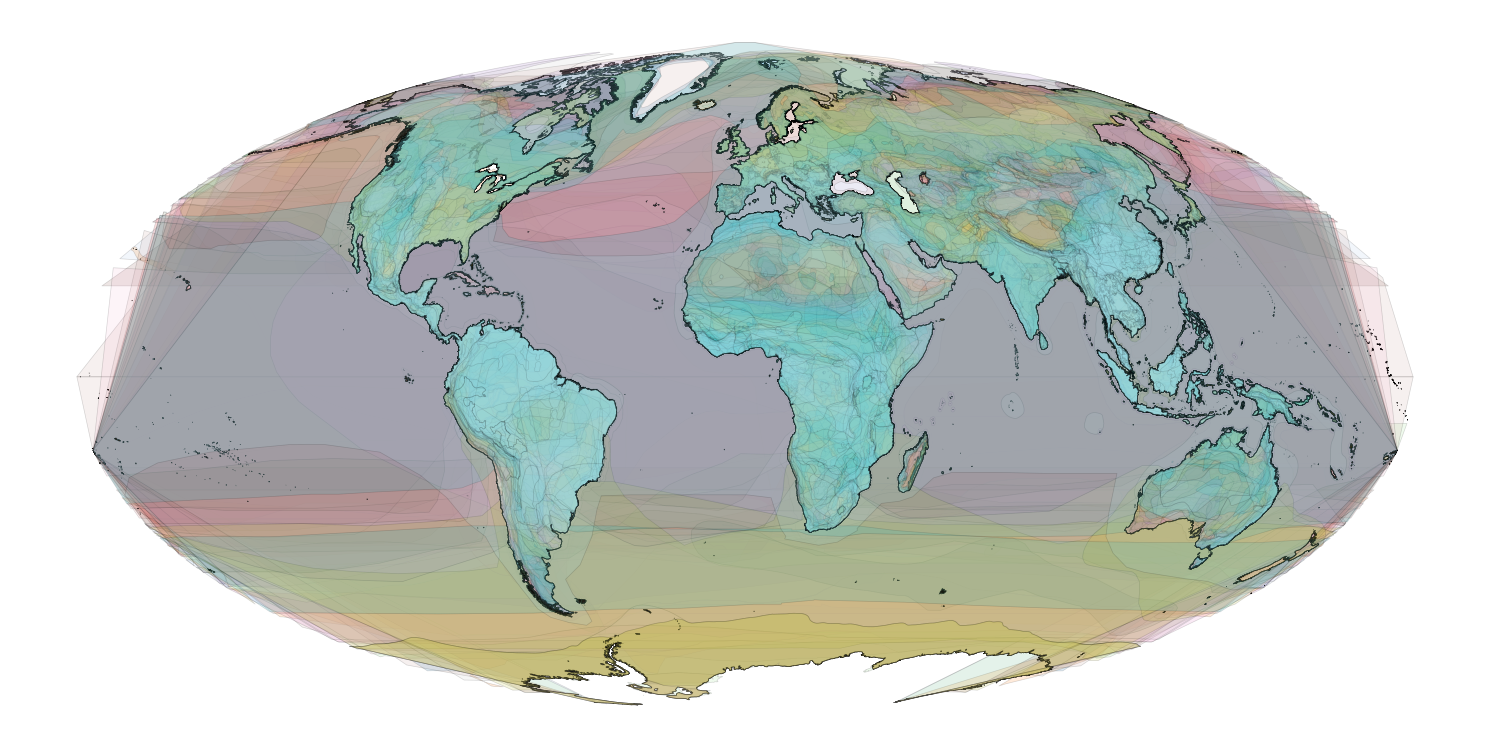

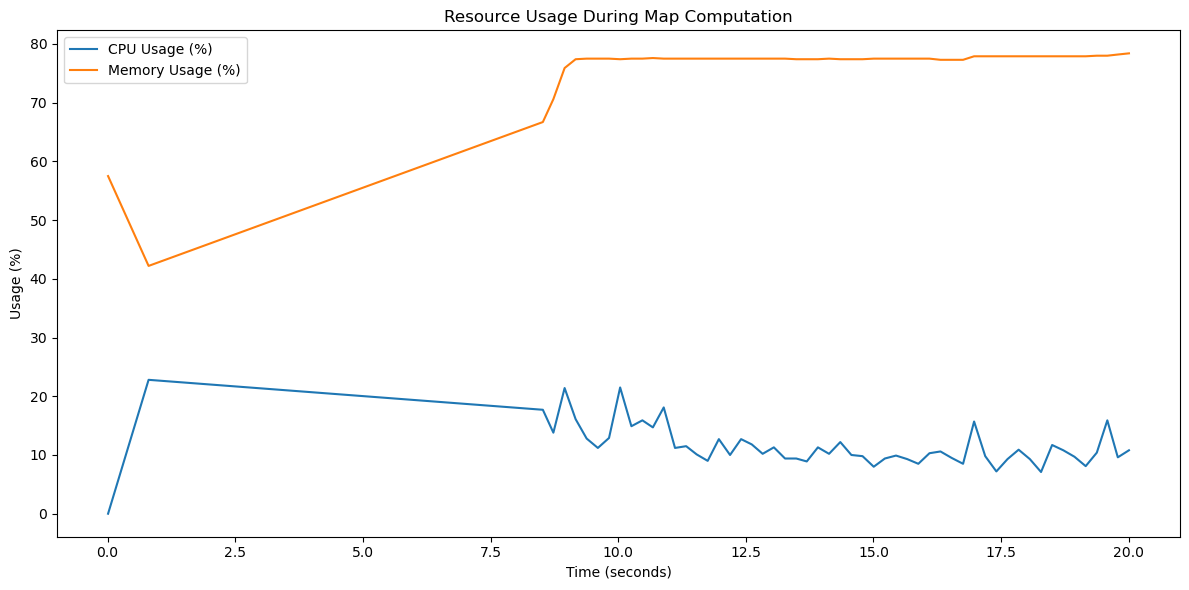

In [37]:
import matplotlib.pyplot as plt
import psutil
import time
from threading import Thread
import pandas as pd

# Function to monitor CPU and RAM usage over time
def monitor_resources(interval=0.5, duration=30):
    data = []
    start_time = time.time()
    while time.time() - start_time < duration:
        cpu = psutil.cpu_percent(interval=None)  # Get CPU usage percentage
        memory = psutil.virtual_memory().percent  # Get RAM usage percentage
        timestamp = time.time() - start_time  # Record time elapsed
        data.append({"time": timestamp, "cpu": cpu, "memory": memory})
        time.sleep(interval)  # Wait for the next interval
    return pd.DataFrame(data)

# Start resource monitoring in a separate thread
resource_data = []

def monitor():
    global resource_data
    resource_data = monitor_resources(interval=0.2, duration=20)  # Monitor every 0.2 seconds for 20 seconds

monitor_thread = Thread(target=monitor)
monitor_thread.start()

# Reproject the GeoDataFrame to Mollweide projection
gdf_iucn_t = gdf_iucn.copy()
gdf_iucn_t = gdf_iucn_t.to_crs('+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')

# Plot the data in Mollweide projection
f, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_iucn_t.plot(ax=ax, edgecolor='k', linewidth=0.5, alpha=0.15, cmap='tab20')

# Final adjustments and save the map
ax.axis('off')  # Turn off the axes
plt.tight_layout()
plt.savefig('worldmap_habitats_Mollweide.png', dpi=1200, bbox_inches='tight')  # Save as high-resolution image
plt.show()

# Wait for the resource monitoring thread to finish
monitor_thread.join()

# Plot the resource usage data
resource_df = pd.DataFrame(resource_data)
plt.figure(figsize=(12, 6))
plt.plot(resource_df['time'], resource_df['cpu'], label='CPU Usage (%)')  # Plot CPU usage
plt.plot(resource_df['time'], resource_df['memory'], label='Memory Usage (%)')  # Plot RAM usage
plt.xlabel('Time (seconds)')
plt.ylabel('Usage (%)')
plt.title('Resource Usage During Map Computation')
plt.legend()
plt.tight_layout()
plt.savefig('resource_usage_visualization.png', dpi=300)  # Save resource usage visualization
plt.show()


This demonstrates why it is practical to filter the dataset to only include necessary data points before performing such operations.

### Filtering Mammal Data for Africa with Bounding Box

This code processes the mammal dataset by performing the following steps:

1. **Load the Dataset**:
   - The full dataset is loaded from the provided shapefile (`MAMMALS.shp`).

2. **Define a Bounding Box for Africa**:
   - A bounding box is created using approximate geographic coordinates that encompass the African continent.

3. **Filter the Dataset**:
   - The dataset is filtered to include only geometries that intersect with the bounding box, ensuring only African data is retained.

4. **Select Relevant Columns**:
   - Only key attributes (`sci_name`, `presence`, `order_`, `family`, `category`, `geometry`) are selected for further analysis to reduce memory usage and focus on essential data.

5. **Output Summary**:
   - Displays the first few rows (`head`) and a summary (`info`) of the filtered dataset to verify the results.

This approach ensures a clean and efficient subset of the global mammal dataset, focusing on Africa for targeted analyses.


In [38]:
import geopandas as gpd
from shapely.geometry import box

# Step 1: Load the full dataset
shapefile_path = "MAMMALS/MAMMALS.shp"
mammals_data = gpd.read_file(shapefile_path)

# Inspect dataset structure (optional)
print(mammals_data.columns)
print(mammals_data.head())

# Step 2: Define the bounding box for Africa
africa_bounds = box(-25, -40, 60, 40)  # minx, miny, maxx, maxy

# Step 3: Filter the dataset for Africa using the bounding box
mammals_data_africa = mammals_data[mammals_data.geometry.intersects(africa_bounds)]

# Step 4: Select relevant columns for further analysis
relevant_columns = ['sci_name', 'presence', 'order_', 'family', 'category', 'geometry']
mammals_data_africa = mammals_data_africa[relevant_columns]

# Display basic information and the first few rows of the filtered data
print(mammals_data_africa.info())
print(mammals_data_africa.head())


Index(['id_no', 'sci_name', 'presence', 'origin', 'seasonal', 'compiler',
       'yrcompiled', 'citation', 'subspecies', 'subpop', 'source', 'island',
       'tax_comm', 'dist_comm', 'generalisd', 'legend', 'kingdom', 'phylum',
       'class', 'order_', 'family', 'genus', 'category', 'marine',
       'terrestria', 'freshwater', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')
       id_no                 sci_name  presence  origin  seasonal compiler  \
0   88149174  Lophostoma occidentalis         1       1         1     IUCN   
1  163314140        Microcebus boraha         1       1         1     IUCN   
2      18555   Pseudomys pilligaensis         1       1         1     IUCN   
3      42396       Capreolus pygargus         1       1         1     IUCN   
4      42396       Capreolus pygargus         1       1         1     IUCN   

   yrcompiled                                           citation subspecies  \
0        2016  IUCN (International Union for Conservation o

### Visualization of Unfiltered Data

This cell provides a broad overview of mammal species distributed across Africa, represented without taxonomic or species-specific filtering. The data is color-coded by taxonomic orders (`order_`) to showcase the diversity of species across the continent. 

To simplify the visualization and computational handling of complex geometries, centroids were used to represent each species' range. Centroids mark the geographic center of each habitat area, allowing for a clearer and less cluttered visualization, especially when working with large and overlapping datasets. 

This raw view of the data highlights the scale and complexity of the dataset, emphasizing the need for filtering and refinement in subsequent analyses.


C:\Users\timsa\AppData\Local\Temp\ipykernel_17900\2222671451.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mammals_data_africa['geometry'] = mammals_data_africa.geometry.centroid


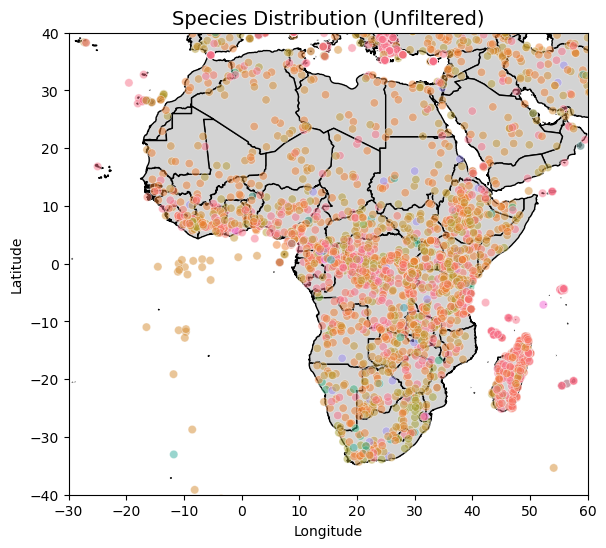

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the world shapefile (replace with the path to your shapefile)
world_shapefile_path = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
world = gpd.read_file(world_shapefile_path)

# Load mammals data (replace with the path to your dataset)
mammals_shapefile_path = "MAMMALS\MAMMALS.shp"  # Update this path
mammals_data_africa = gpd.read_file(mammals_shapefile_path)

# Ensure the mammals data uses the same CRS as the world shapefile
mammals_data_africa = mammals_data_africa.to_crs(world.crs)

# Step 1: Calculate centroids for simplification (if geometries are complex)
# Centroids represent the center of each geometry
mammals_data_africa = mammals_data_africa.copy()
mammals_data_africa['geometry'] = mammals_data_africa.geometry.centroid

# Step 2: Extract coordinates for visualization (Longitude and Latitude)
mammals_data_africa['Longitude'] = mammals_data_africa.geometry.x
mammals_data_africa['Latitude'] = mammals_data_africa.geometry.y

# Step 3: Plot the unfiltered species distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the world basemap
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot species distribution (unfiltered data)
sns.scatterplot(
    data=mammals_data_africa,
    x='Longitude',
    y='Latitude',
    hue='order_',  # Group by taxonomic order
    alpha=0.5,     # Transparency to handle overlapping points
    legend=False,  # Disable legend due to a high number of unique orders
    ax=ax
)

# Set axis limits for a focused view of Africa
ax.set_xlim(-30, 60)
ax.set_ylim(-40, 40)

# Add a title and axis labels
plt.title('Species Distribution (Unfiltered)', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Visualization of Filtered Data

Given the vast number of species in the unfiltered dataset, a focused analysis is necessary to make the data more manageable and insightful. This visualization concentrates on specific species highlighted by the WWF for their ecological and conservation significance. These species include:

1. **Bonobos (Pan paniscus)**  
2. **Chimpanzees (Pan troglodytes)**  
3. **Western Gorillas (Gorilla gorilla)**  
4. **Forest Elephants (Loxodonta cyclotis)**  
5. **Hippopotamuses (Hippopotamus amphibius)**  

C:\Users\timsa\AppData\Local\Temp\ipykernel_17900\3124136269.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_data['geometry'] = filtered_data.geometry.centroid


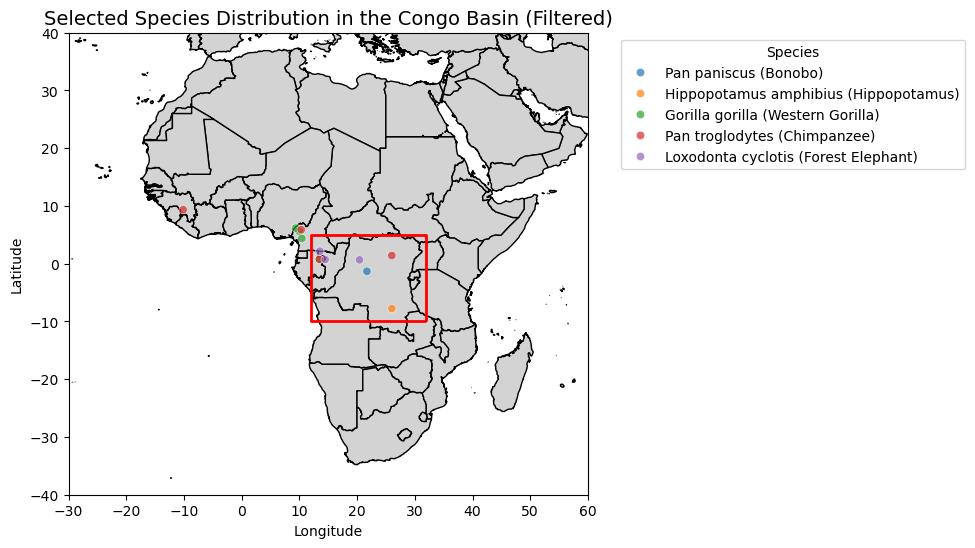

Selected species with common names:
['Pan paniscus (Bonobo)' 'Hippopotamus amphibius (Hippopotamus)'
 'Gorilla gorilla (Western Gorilla)' 'Pan troglodytes (Chimpanzee)'
 'Loxodonta cyclotis (Forest Elephant)']


In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import box

# Load the mammals dataset (replace with the actual path to your dataset)
mammals_shapefile_path = "MAMMALS\MAMMALS.shp"  # Update this path
mammals_data_africa = gpd.read_file(mammals_shapefile_path)

# Filter the data for relevant species (add more species if needed)
species_of_interest = [
    "Pan paniscus", 
    "Pan troglodytes", 
    "Gorilla gorilla", 
    "Loxodonta cyclotis", 
    "Hippopotamus amphibius"
]

filtered_data = mammals_data_africa[mammals_data_africa['sci_name'].isin(species_of_interest)].copy()

# Ensure the data has consistent CRS with the world map
world_shapefile_path = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
world = gpd.read_file(world_shapefile_path)
filtered_data = filtered_data.to_crs(world.crs)

# Convert geometries to centroids to ensure point geometries
filtered_data['geometry'] = filtered_data.geometry.centroid

# Extract coordinates for visualization
filtered_data['Longitude'] = filtered_data.geometry.x
filtered_data['Latitude'] = filtered_data.geometry.y

# Mapping scientific names to common English names
species_common_names = {
    "Pan paniscus": "Bonobo",
    "Pan troglodytes": "Chimpanzee",
    "Gorilla gorilla": "Western Gorilla",
    "Loxodonta cyclotis": "Forest Elephant",
    "Hippopotamus amphibius": "Hippopotamus"
}

# Combine scientific names with common English names
filtered_data['combined_name'] = filtered_data['sci_name'] + " (" + filtered_data['sci_name'].map(species_common_names) + ")"

# Plot the filtered species distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the basemap
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot species distribution (filtered)
sns.scatterplot(
    data=filtered_data,
    x='Longitude',
    y='Latitude',
    hue='combined_name',  # Group by combined name
    alpha=0.7,
    ax=ax
)

# Define the Congo Basin bounding box (replace with actual coordinates)
congo_box = gpd.GeoDataFrame(
    {'geometry': [box(12, -10, 32, 5)]},  # Define a bounding box with minx, miny, maxx, maxy
    crs=world.crs
)

# Plot the Congo Basin bounding box
congo_box.boundary.plot(ax=ax, color='red', linewidth=2)

# Add title and axis labels
ax.set_xlim(-30, 60)
ax.set_ylim(-40, 40)
plt.title('Selected Species Distribution in the Congo Basin (Filtered)', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Species')
plt.show()

# Print the selected species with common names
print("Selected species with common names:")
print(filtered_data['combined_name'].unique())


The results clearly show that many of these iconic species are found within the Congo Basin, emphasizing the ecological importance of this region. The red bounding box highlights the Congo Basin, which is a central focus for biodiversity conservation efforts.

For more information on WWF's conservation efforts in the Congo Basin, visit:  
[WWF Congo Basin Conservation](https://www.wwf.de/themen-projekte/projektregionen/kongo-becken)

This code visualizes the habitat areas of the previous selected species in the Congo Basin on a map. It filters a geospatial dataset to focus on five species of interest (bonobos, chimpanzees, gorillas, forest elephants, and hippopotamuses) and reprojects their data to match the coordinate system of a world map. Each species' habitat is plotted in a distinct color, and a custom legend provides clear labeling for the species. The map is also centered on Africa, highlighting the Congo Basin region, with habitat overlaps displayed through semi-transparency for better visualization.

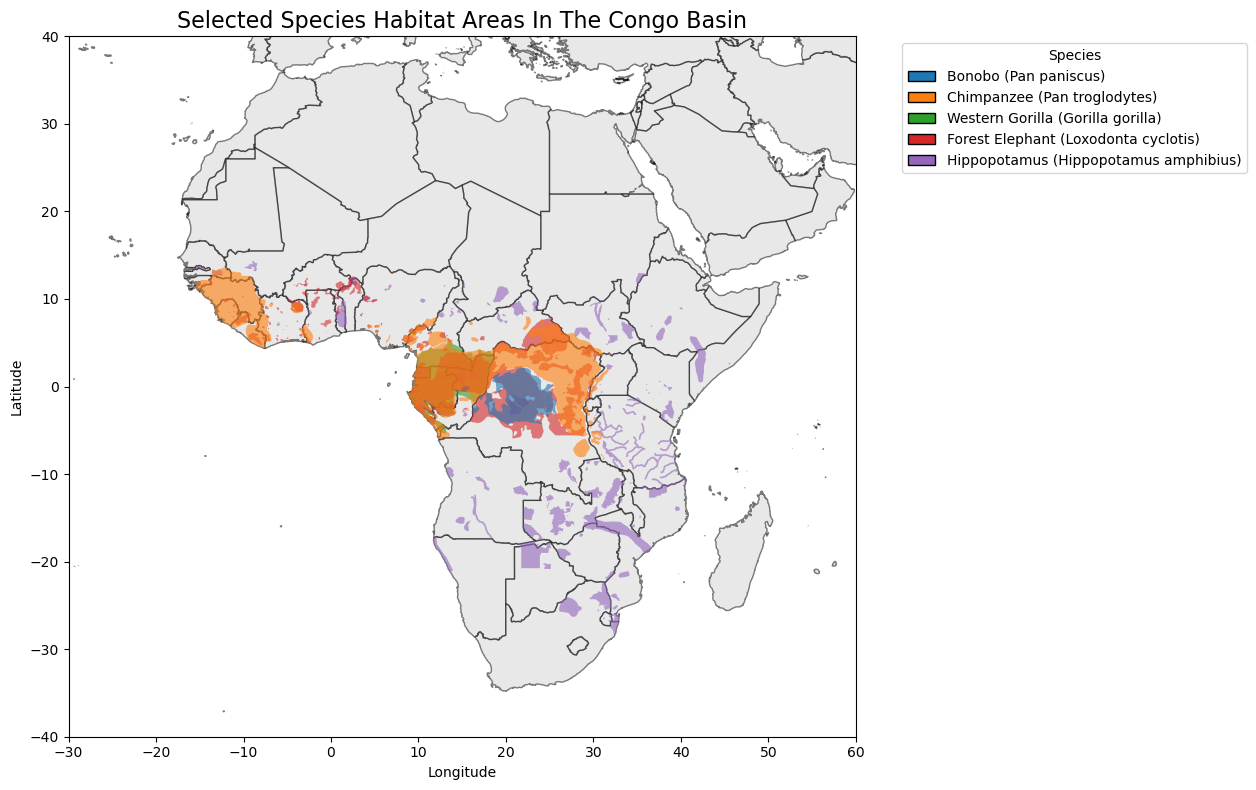

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

# Load the mammals dataset (replace with the correct path)
mammals_shapefile_path = "MAMMALS/MAMMALS.shp"
mammals_data_africa = gpd.read_file(mammals_shapefile_path)

# Filter the data for the species of interest
species_of_interest = [
    "Pan paniscus", 
    "Pan troglodytes", 
    "Gorilla gorilla", 
    "Loxodonta cyclotis", 
    "Hippopotamus amphibius"
]
filtered_data = mammals_data_africa[mammals_data_africa['sci_name'].isin(species_of_interest)].copy()

# Ensure CRS matches for consistent plotting
world_shapefile_path = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
world = gpd.read_file(world_shapefile_path)
filtered_data = filtered_data.to_crs(world.crs)

# Map scientific names to common names
species_common_names = {
    "Pan paniscus": "Bonobo",
    "Pan troglodytes": "Chimpanzee",
    "Gorilla gorilla": "Western Gorilla",
    "Loxodonta cyclotis": "Forest Elephant",
    "Hippopotamus amphibius": "Hippopotamus"
}
filtered_data['common_name'] = filtered_data['sci_name'].map(species_common_names)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the world map
world.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# Define a color map for the species
color_map = dict(zip(species_of_interest, mcolors.TABLEAU_COLORS))

# Plot habitat areas for each species with unique colors
for sci_name, group in filtered_data.groupby('sci_name'):
    group.plot(
        ax=ax, 
        color=color_map[sci_name], 
        alpha=0.6
    )

# Create a custom legend
legend_elements = [
    Patch(facecolor=color_map[sci_name], edgecolor='black', label=f"{species_common_names[sci_name]} ({sci_name})")
    for sci_name in species_of_interest
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title='Species')

# Center the map on Africa
ax.set_xlim(-30, 60)  # Adjust longitude range to focus on Africa
ax.set_ylim(-40, 40)  # Adjust latitude range to focus on Africa

# Add title and labels
plt.title('Selected Species Habitat Areas In The Congo Basin', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


#### **Outcome**:
- A clear visualization of the selected species' geographical distribution was generated, offering valuable insights into their presence within the Congo Basin and surrounding regions.

This section serves as a stepping stone for deeper analyses, such as assessing species-specific threats or habitat preferences or comparing it to other country specific datasets.